<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-09 12:12:23--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.3’

survey-data.csv.3   100%[===================>] 152.13M  46.2MB/s    in 3.3s    

2025-11-09 12:12:28 (45.8 MB/s) - ‘survey-data.csv.3’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
## Write your code here
Query = """ SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal >0""" 
df_comptotal = pd.read_sql_query(Query , conn)

In [11]:
df_comptotal.head()

,CompTotal
0,2040000.0
1,28000.0
2,85000.0
3,50000.0
4,110000.0


In [12]:
df_comptotal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33613 entries, 0 to 33612
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CompTotal  33613 non-null  float64
dtypes: float64(1)
memory usage: 262.7 KB


<Figure size 1000x600 with 0 Axes>

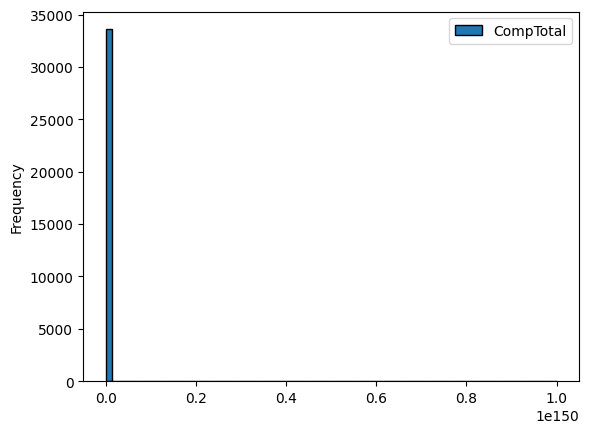

In [13]:
plt.figure(figsize = (10,6)) 
df_comptotal.plot(kind = 'hist',  
                  bins =75,
                  edgecolor = 'black', 
                  grid = False) 
plt.show()

In [14]:
!pip install numpy
import numpy as np

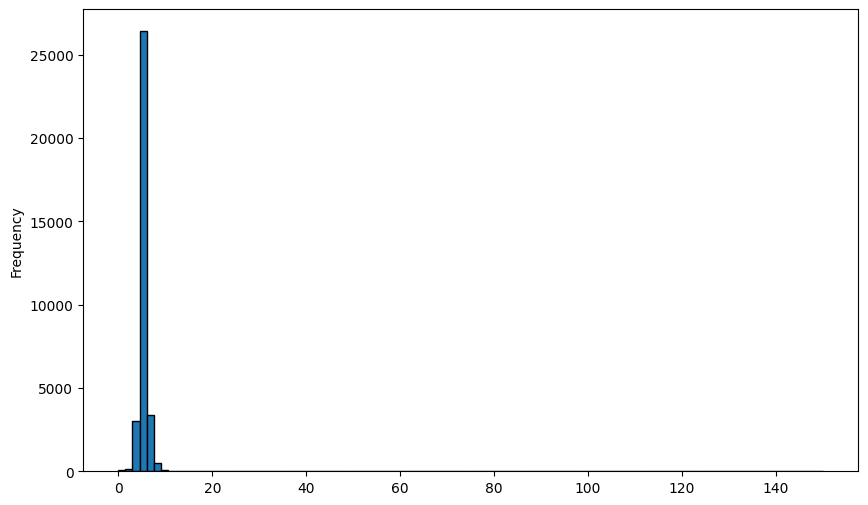

In [15]:
df_comptotal['CompTotal_log'] = np.log10(df_comptotal['CompTotal']) 
plt.figure(figsize =(10,6))
df_comptotal['CompTotal_log'].plot(kind = 'hist' , 
                                   bins = 100,
                                   edgecolor = 'black') 
plt.show()

**Box Plots**

Plot a box plot of Age.


In [16]:
## Write your code here
Query = """ SELECT Age FROM main WHERE Age IS NOT NULL AND Age >0""" 
df_Age = pd.read_sql_query(Query , conn) 
df_Age.head()

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old


In [17]:
df_Age.describe()

,Age
count,65437
unique,8
top,25-34 years old
freq,23911


In [18]:
df_Age['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [19]:
map_age = {'Under 18 years old' : 17, 
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '18-24 years old': 21.0, 
           '25-34 years old': 29.5, 
           '55-64 years old': 59.5,
           'Prefer not to say': np.nan, 
           '65 years or older' : 67.5}
df_Age['Age'] = df_Age['Age'].map(map_age) 

In [20]:
df_Age['Age'].describe()

count    65115.000000
mean        33.017669
std         11.112079
min         17.000000
25%         21.000000
50%         29.500000
75%         39.500000
max         67.500000
Name: Age, dtype: float64

In [21]:
df_Age.dropna(axis =0, inplace = True)

In [22]:
df_Age['Age'].isnull().sum()

np.int64(0)

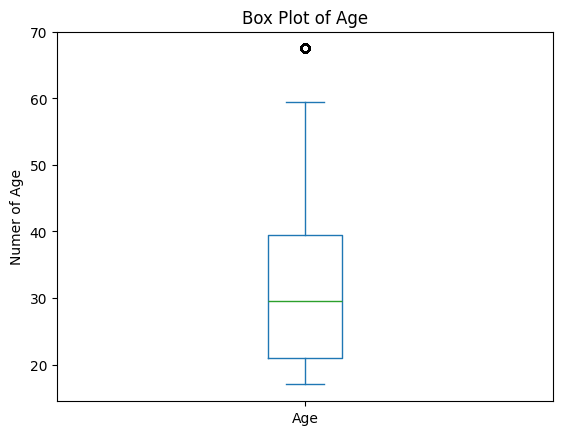

In [23]:
df_Age.plot(kind ='box') 
plt.title('Box Plot of Age') 
plt.ylabel('Numer of Age') 
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


In [24]:
## Write your code here
Query = """ SELECT Age, WorkExp FROM main;""" 
df_age_exp = pd.read_sql_query(Query, conn) 
df_age_exp.head()

,Age,WorkExp
0,Under 18 years old,NaN
1,35-44 years old,17.0
2,45-54 years old,NaN
3,18-24 years old,NaN
4,18-24 years old,NaN


In [25]:
df_age_exp['Age'] = df_age_exp['Age'].map(map_age)

In [26]:
df_age_exp.dropna(subset=['Age','WorkExp'], inplace = True)

In [27]:
df_age_exp.isnull().sum()

Age        0
WorkExp    0
dtype: int64

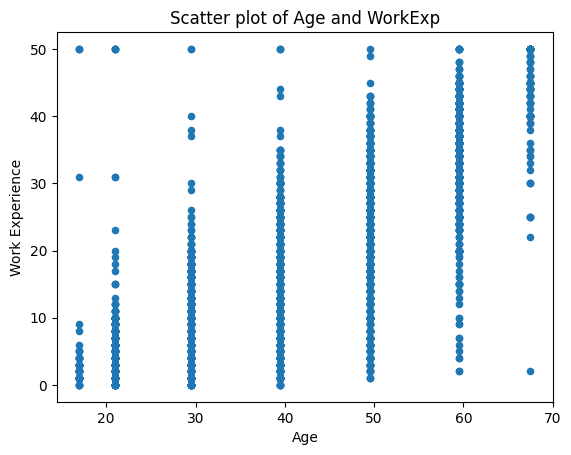

In [28]:
df_age_exp.plot(kind = 'scatter', x ='Age', y = 'WorkExp')
plt.title('Scatter plot of Age and WorkExp') 
plt.ylabel('Work Experience') 
plt.xlabel('Age') 
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [29]:
## Write your code here
df_bub = pd.read_sql_query("""SELECT TimeSearching, Frustration, Age FROM main""", conn) 
df_bub.head()

,TimeSearching,Frustration,Age
0,None,None,Under 18 years old
1,None,None,35-44 years old
2,None,None,45-54 years old
3,None,None,18-24 years old
4,None,None,18-24 years old


In [30]:
df_bub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TimeSearching  28911 non-null  object
 1   Frustration    28251 non-null  object
 2   Age            65437 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


In [31]:
df_bub['TimeSearching'].unique()

array([None, '30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [32]:
df_bub['Frustration'].unique()

array([None,
       'Amount of technical debt;Number of software tools in use;Tracking my work;Showing my contributions',
       'Amount of technical debt;Complexity of tech stack for deployment',
       'Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build;Maintaining security of code being produced',
       'Amount of technical debt;Tracking my work;Complexity of tech stack for build;Patching/updating core components;Maintaining security of systems/platforms used in work;Reliability of tools/systems used in work',
       'Number of software tools in use;Tracking my work;Showing my contributions;Complexity of tech stack for build',
       'Amount of technical debt',
       'Amount of technical debt;Number of software tools in use',
       'None of these',
       'Amount of technical debt;Tracking my work;Showing my contributions;Complexity of tech stack for deployment',
       'Amount of technical debt;Complexity of tech stack for build',

In [33]:
df_bub['avg_Age'] = df_bub['Age'].map(map_age)

In [34]:
map_timesearch = {'None' : 0 , 
                  '30-60 minutes a day': 45, 
                  '60-120 minutes a day': 90,
                  '15-30 minutes a day': 22.5, 
                  'Less than 15 minutes a day' : 10,
                   'Over 120 minutes a day': 130} 
df_bub['Avg_Timesearch/day'] = df_bub['TimeSearching'].map(map_timesearch)

In [35]:
df_bub_split = df_bub.assign(Frustrate_Split = df_bub['Frustration'].str.split(';')).explode('Frustrate_Split').copy() 
df_bub_split['Frustrate_Split'] = df_bub_split['Frustrate_Split'].str.strip()
df_bub_split['Frustrate_Split'].unique()

array([None, 'Amount of technical debt',
       'Number of software tools in use', 'Tracking my work',
       'Showing my contributions',
       'Complexity of tech stack for deployment',
       'Complexity of tech stack for build',
       'Maintaining security of code being produced',
       'Patching/updating core components',
       'Maintaining security of systems/platforms used in work',
       'Reliability of tools/systems used in work', 'None of these'],
      dtype=object)

In [36]:
df_bub_split.describe(include ='all')

,TimeSearching,Frustration,Age,avg_Age,Avg_Timesearch/day,Frustrate_Split
count,84094,83709,120895,120467.000000,84094.000000,83709
unique,5,954,8,NaN,NaN,11
top,30-60 minutes a day,None of these,25-34 years old,NaN,NaN,Amount of technical debt
freq,32605,2364,48211,NaN,NaN,17614
mean,NaN,NaN,NaN,33.573738,52.494916,NaN
std,NaN,NaN,NaN,10.439450,34.326877,NaN
min,NaN,NaN,NaN,17.000000,10.000000,NaN
25%,NaN,NaN,NaN,29.500000,22.500000,NaN
50%,NaN,NaN,NaN,29.500000,45.000000,NaN
75%,NaN,NaN,NaN,39.500000,90.000000,NaN


In [37]:
df_bub_split.dropna(inplace=True)

In [38]:
df_bub_split.describe(include ='all')

,TimeSearching,Frustration,Age,avg_Age,Avg_Timesearch/day,Frustrate_Split
count,83115,83115,83115,83115.000000,83115.000000,83115
unique,5,953,7,NaN,NaN,11
top,30-60 minutes a day,None of these,25-34 years old,NaN,NaN,Amount of technical debt
freq,32280,2344,36391,NaN,NaN,17483
mean,NaN,NaN,NaN,34.255327,52.492691,NaN
std,NaN,NaN,NaN,9.600381,34.306072,NaN
min,NaN,NaN,NaN,17.000000,10.000000,NaN
25%,NaN,NaN,NaN,29.500000,22.500000,NaN
50%,NaN,NaN,NaN,29.500000,45.000000,NaN
75%,NaN,NaN,NaN,39.500000,90.000000,NaN


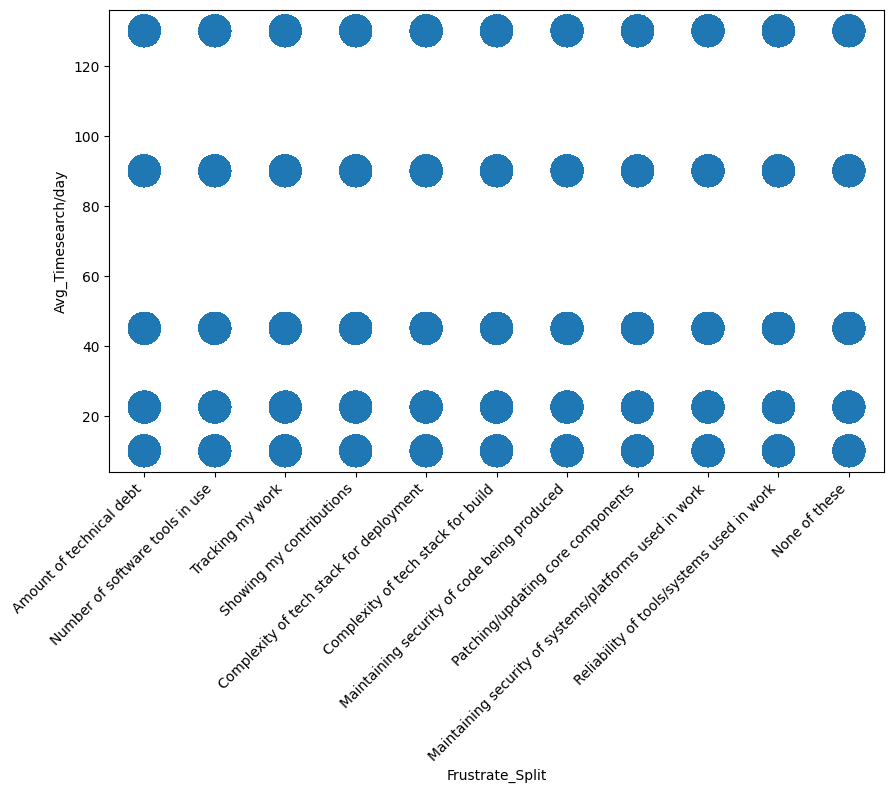

In [39]:
df_bub_split.plot(kind = 'scatter', 
                  x = 'Frustrate_Split',
                  y = 'Avg_Timesearch/day',
                  s = 'avg_Age', 
                  figsize = (10,6),
                  sizes = (10, 500),
                  alpha = 0.5)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [40]:
## Write your code here
Top_5_db = pd.read_sql("""SELECT DatabaseWantToWorkWith FROM main""", conn) 
Top_5_db.head()

,DatabaseWantToWorkWith
0,None
1,PostgreSQL
2,Firebase Realtime Database
3,MongoDB;MySQL;PostgreSQL
4,PostgreSQL;SQLite


In [41]:
Top_5_db['DatabaseWantToWorkWith'].unique()

array([None, 'PostgreSQL', 'Firebase Realtime Database', ...,
       'Cassandra;Firebase Realtime Database;MariaDB;Microsoft Access;MongoDB;MySQL;PostgreSQL;Redis',
       'MySQL;Presto;TiDB',
       'BigQuery;Cassandra;Databricks SQL;DuckDB;Elasticsearch;Firebase Realtime Database;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis;Snowflake;SQLite;Supabase'],
      shape=(8479,), dtype=object)

In [42]:
Top_5_db.describe()

,DatabaseWantToWorkWith
count,42558
unique,8478
top,PostgreSQL
freq,3738


In [43]:
Top_5 = pd.read_sql("""SELECT DatabaseWantToWorkWith, COUNT(DatabaseWantToWorkWith) AS "Top_5_DB" FROM main GROUP BY DatabaseWantToWorkWith ORDER BY Top_5_DB DESC LIMIT 5;""", conn) 
print(Top_5)

  DatabaseWantToWorkWith  Top_5_DB
0             PostgreSQL      3738
1      PostgreSQL;SQLite      1533
2                 SQLite      1476
3   Microsoft SQL Server      1431
4                  MySQL      1139


In [44]:
Top_5.set_index('DatabaseWantToWorkWith', inplace=True)

In [45]:
Top_5

,Top_5_DB
DatabaseWantToWorkWith,
PostgreSQL,3738
PostgreSQL;SQLite,1533
SQLite,1476
Microsoft SQL Server,1431
MySQL,1139


<Figure size 1000x1000 with 0 Axes>

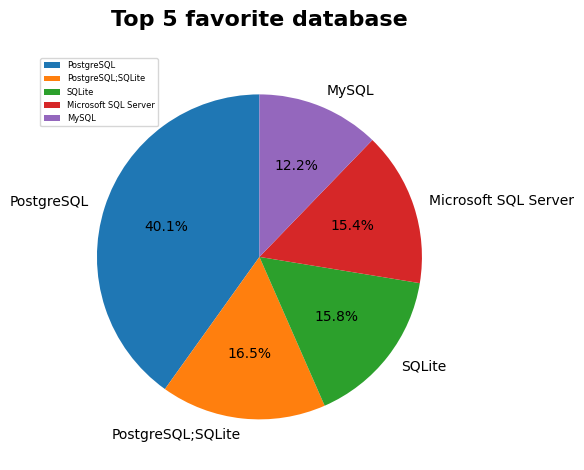

In [46]:
plt.figure(figsize= (10,10))
plot = Top_5.plot(y ='Top_5_DB', 
           kind ='pie', 
           autopct = '%1.1f%%', 
          startangle = 90,
          )
plt.title('Top 5 favorite database', fontsize = 16, fontweight ='bold', pad =20) 
plot.set_ylabel('') 
plot.set_aspect('equal')
plt.legend(loc = 'upper left', bbox_to_anchor=(-0.05,1), fontsize = 6)
plt.tight_layout()
plt.show()

In [47]:
## Write your code here
Top_5_db_sp= Top_5_db.assign(split_db = Top_5_db['DatabaseWantToWorkWith'].str.split(';')).explode('split_db').copy() 
Top_5_all = Top_5_db_sp.groupby('split_db').size().nlargest(5) 
Top_5_all

split_db
PostgreSQL    24005
SQLite        13489
MySQL         12269
MongoDB       10982
Redis         10847
dtype: int64

<Axes: >

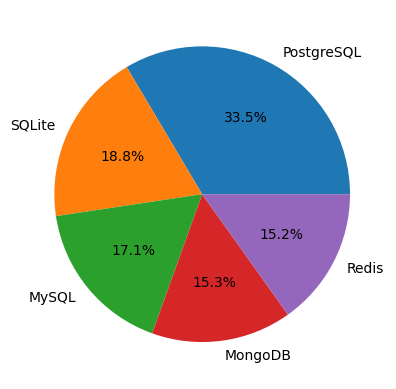

In [48]:
Top_5_all.plot(kind = 'pie', autopct = '%1.1f%%')

In [49]:
Top_5_all_df = Top_5_all.to_frame()
Top_5_all_df

,0
split_db,
PostgreSQL,24005
SQLite,13489
MySQL,12269
MongoDB,10982
Redis,10847


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [50]:
df_stacked = pd.read_sql("""SELECT TimeSearching, TimeAnswering from main WHERE Age = '25-34 years old';""", conn)

In [51]:
df_stacked.describe()

,TimeSearching,TimeAnswering
count,12603,12561
unique,5,5
top,30-60 minutes a day,15-30 minutes a day
freq,4901,4226


In [52]:
df_stacked['TimeSearching'].unique()

array([None, '15-30 minutes a day', 'Less than 15 minutes a day',
       '60-120 minutes a day', '30-60 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [53]:
df_stacked['TimeAnswering'].unique()

array([None, '30-60 minutes a day', '15-30 minutes a day',
       'Less than 15 minutes a day', '60-120 minutes a day',
       'Over 120 minutes a day'], dtype=object)

In [54]:
df_bar = df_stacked.groupby(['TimeSearching', 'TimeAnswering']).size().reset_index()

In [55]:
df_bar

,TimeSearching,TimeAnswering,0
0,15-30 minutes a day,15-30 minutes a day,1261
1,15-30 minutes a day,30-60 minutes a day,911
2,15-30 minutes a day,60-120 minutes a day,283
3,15-30 minutes a day,Less than 15 minutes a day,802
4,15-30 minutes a day,Over 120 minutes a day,51
5,30-60 minutes a day,15-30 minutes a day,1672
6,30-60 minutes a day,30-60 minutes a day,1620
7,30-60 minutes a day,60-120 minutes a day,619
8,30-60 minutes a day,Less than 15 minutes a day,833
9,30-60 minutes a day,Over 120 minutes a day,127


In [56]:
df_stacked['TimeSearching'] = df_stacked['TimeSearching'].map(map_timesearch) 
df_stacked['TimeAnswering'] = df_stacked['TimeAnswering'].map(map_timesearch) 
df_stacked.head()

,TimeSearching,TimeAnswering
0,NaN,NaN
1,22.5,45.0
2,10.0,22.5
3,90.0,22.5
4,NaN,NaN


In [57]:
df_stacked.dropna(inplace = True)

In [58]:
df_stack_median = df_stacked[['TimeSearching', 'TimeAnswering']].median()

In [59]:
df_stack_median

TimeSearching    45.0
TimeAnswering    22.5
dtype: float64

<Axes: >

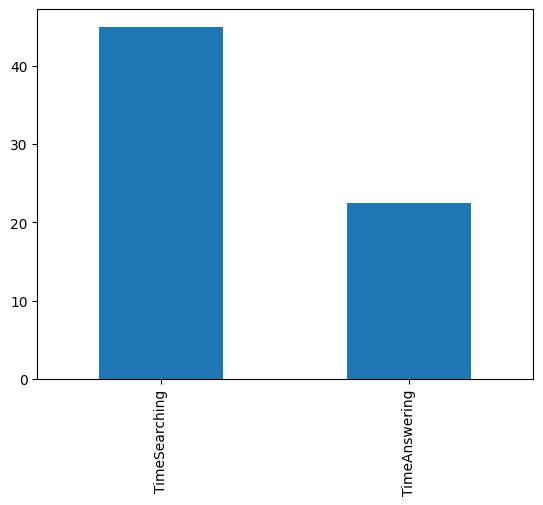

In [60]:
df_stack_median.plot(kind = 'bar', stacked = True)

In [61]:
print(type(df_stack_median))

<class 'pandas.core.series.Series'>


In [73]:
df_stack_median = df_stack_median.to_frame().transpose()

In [74]:
df_stack_median.index = ['Time Allocate'] 
df_stack_median

,TimeSearching,TimeAnswering
Time Allocate,45.0,22.5


<Figure size 1000x600 with 0 Axes>

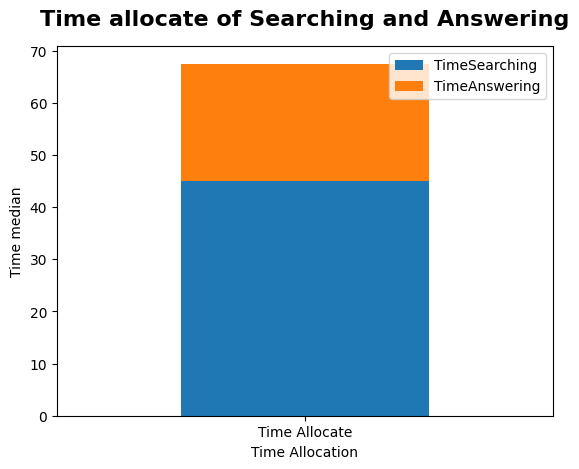

In [75]:
plt.figure(figsize = (10,6))
df_stack_median.plot(kind = 'bar', stacked = True)
plt.title('Time allocate of Searching and Answering', fontsize = 16, fontweight = 'bold', pad = 15) 
plt.ylabel('Time median') 
plt.xlabel('Time Allocation') 
plt.xticks(rotation = 0)
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [65]:
## Write your code here
df_r_ct = pd.read_sql("SELECT Age, CompTotal FROM main WHERE Age = '45-54 years old' OR Age = '55-64 years old';", conn) 


In [66]:
df_r_ct.head()

,Age,CompTotal
0,45-54 years old,NaN
1,45-54 years old,NaN
2,45-54 years old,NaN
3,45-54 years old,NaN
4,45-54 years old,NaN


In [67]:
df_r_ct.dropna(inplace =True)

In [68]:
df_r_ct.set_index('Age', inplace = True)

In [69]:
df_r_ct.index = df_r_ct.index.map({'45-54 years old' : 49.5, '55-64 years old' : 59.5})

In [70]:
df_r_ct.head()

,CompTotal
Age,
49.5,95000.0
49.5,195000.0
59.5,54000.0
49.5,145000.0
59.5,80000.0


<Axes: xlabel='Age'>

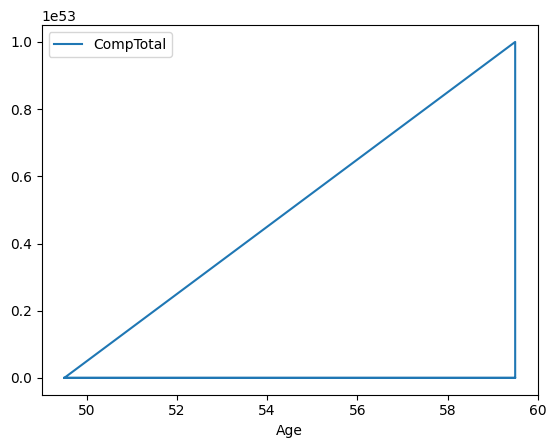

In [71]:
df_r_ct.plot(kind = 'line')

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [77]:
## Write your code here
df_MB = pd.read_sql("SELECT MainBranch, COUNT(MainBranch) FROM main GROUP BY MainBranch;", conn) 
df_MB.head()

,MainBranch,COUNT(MainBranch)
0,I am a developer by profession,50207
1,I am learning to code,3875
2,"I am not primarily a developer, but I write co...",6511
3,I code primarily as a hobby,3334
4,"I used to be a developer by profession, but no...",1510


In [80]:
df_MB.set_index('MainBranch', inplace = True)

In [81]:
df_MB

,COUNT(MainBranch)
MainBranch,
I am a developer by profession,50207
I am learning to code,3875
"I am not primarily a developer, but I write code sometimes as part of my work/studies",6511
I code primarily as a hobby,3334
"I used to be a developer by profession, but no longer am",1510


<Axes: ylabel='MainBranch'>

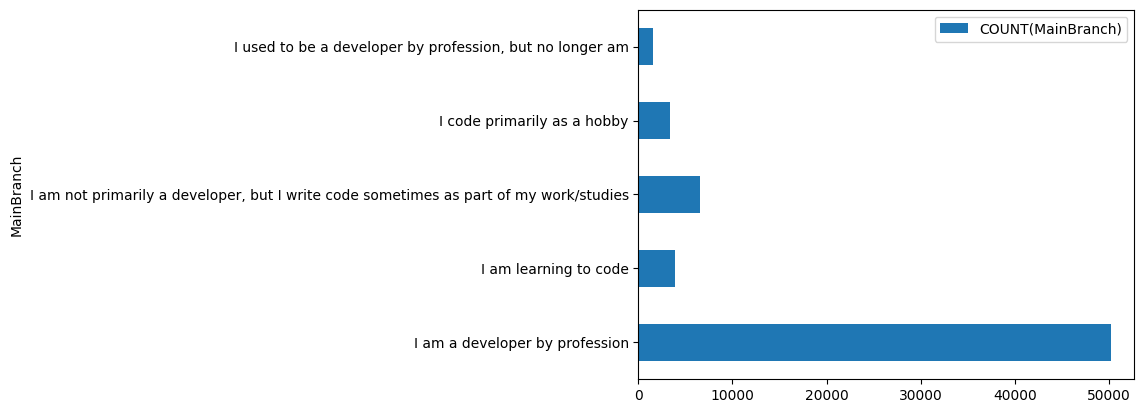

In [82]:
df_MB.plot(kind = 'barh')

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [83]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
